# 2.1 Machine Learning with Shallow Neural Networks

It is easier to optimize traditional machine learning models in data-lean settings. They are also more interpretable.

As more data is available, neural networks have an advantage because they retain **flexibility**.

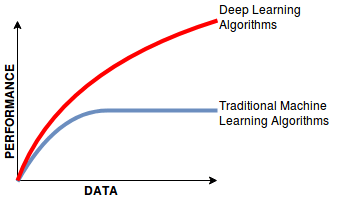

A common way to view deep learning models is as a stacking of simpler models.

Supervised learning: the task of learning a function that maps an input to an output based on example input-output pairs.

Unsupervised learning: self-organized learning that helps find previously unknown patterns in data set without pre-existing labels.

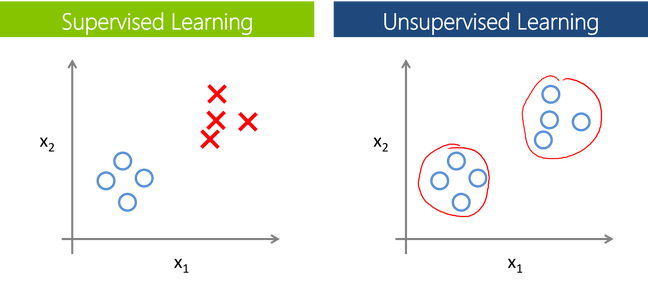

# 2.2 Neural Architectures for Binary Classification Models

Neural architectures vary little from the perceptron model. The main difference is the choice of the activation function in the final layer and the loss function used on the outputs.

Remember that in this section, a single-layer network with $d$ input nodes and a single output node will be used. Coefficients of connections from the $d$ input nodes to the output nodes are denoted by a weight vector $\overline{W} = (w_1, \dots, w_d)$. Also biases are not shown.

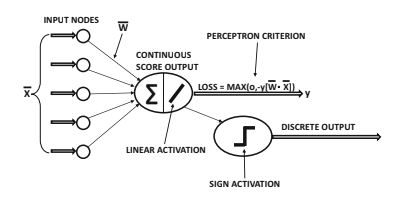

## 2.2.1 Revisiting the Perceptron

Let $(\overline{X}_i, y_i)$ be a training instance, in which the observed value $y_i$ is predicted from the
feature variables $\overline{X}_i$ using the following relationship:

$$\hat{y}_i = \text{sign}(\overline{W} \cdot \overline{X}_i)$$

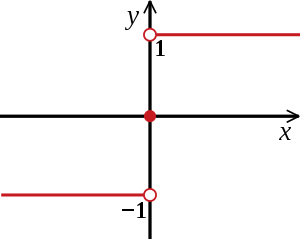

$\overline{W}$ is the weight vector learned by the perceptron through backpropagation. All values with a hat above them like $\hat{y}_i$ are predicted values, not observed values.

**Goal**: Make the difference between the predicted and observed values small

However since we want this to be iterative and approach a solution, the updates to the weight vector are proportional to the difference between the observed and predicted output value.

$$\overline{W} \impliedby \overline{W}(1-\alpha \lambda) + \alpha (y_i - \hat{y}_i) \overline{X}_i \qquad (2.2)$$

Unfortunately, the update to the weight vector and loss function are not consistent, an alternative is 

$$\overline{W} \impliedby \overline{W}(1-\alpha \lambda) + \alpha y_i \overline{X}_i [I(y_i \hat{y}_i < 0)] \qquad (2.3)$$

Updates in this case are only performed when a training instance is misclassified (hence the indicator function).

(2.3) *can be shown* to be consistent with the loss function $L_i$ for the $i^{th}$ instance.

$$L_i = \max\{0, -y_i (\overline{W} \cdot \overline{X}_i)\} = \max\{0, -y_i \hat{y}_i\}$$

This loss function is also known as the *perceptron criterion*.

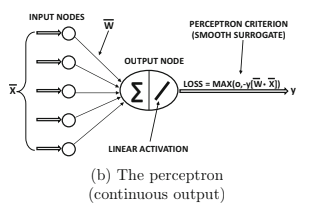

Note that it outputs a continuous range, hence one could extend the architecture of the network.

## 2.2.2 Least-Squares Regression

There are $n$ training pairs of $(\overline{X}_i, y_i)$'s. Each $\overline{X}_i$ is a $d$ dimensional vector and each $y_i$ is a real valued target.

Accordingly the predicted output value is related to the feature variables $\overline{X}_i$'s by the dot product with the weight vector:

$$\hat{y} = \overline{W} \cdot \overline{X}_i$$

Each $\hat{y}_i$ (prediction) is imperfect and therefore has an error term associated with it, namely $e_i$.

$$e_i = (y_i - \hat{y}_i) \qquad \text{observed - predicted... aka residual}$$

In order to get good predictions, one must "teach" $\overline{W}$ the correct $d$ coefficients, so that the total squared error is minimized.

$$ \text{Minimize } \sum_{i=1}^n e_i^2$$

For the $i^{th}$ instance, the error associated with that instance is simply the residual squared for that particular instance, i.e.

$$L_i = e_i^2 = (y_i - \hat{y}_i)^2$$

This architecture is then the same as the perceptron except for this difference in the loss.

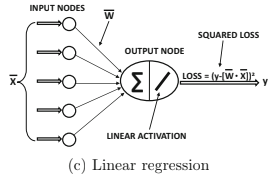

So its nearly identical except that the real-valued errors are used here instead of discrete errors.

The gradient descent steps are then determined by computing the gradient of the residual squared.

$$\frac{\partial e_i^2}{\partial \overline{W}} = -e_i \overline{X}_i \qquad (2.7)$$

And then the updates for the weight vector are computed as follows with a step size determined by $\alpha$:

$$\overline{W} \impliedby \overline{W} + \alpha e_i \overline{X} = \overline{W} + \alpha (y_i - \hat{y}_i) \overline{X}$$

If we add regularization to prevent overfitting, the above equation just gets a penalty on the weight vector determined by a parameter $\lambda$:

$$\overline{W} \impliedby \overline{W} (1- \alpha \cdot \lambda) + \alpha (y_i - \hat{y}_i) \overline{X} \qquad (2.9)$$

This is exactly (2.2), but again, we are using real values here instead of discrete values. 

### 2.2.2.1 Widrow-Hoff Learning

The perceptron algorithm never penalizes a positive class point for $\overline{W} \cdot \overline{X}_i$ being “too correct” (i.e., larger than 1),

However using real-valued predictions to compute the error has the unfortunate effect of penalizing points deemed "too-correct". This inappropriate penalization of over-performance is the Achilles heel of Widrow-Hoff learning and the Fisher discriminant.

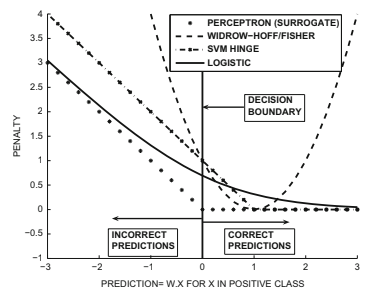

Because Widrow-Hoff uses only binary responses, the loss function can be simplified to:

$$L_i = (1 - \hat{y}_i y_i)^2$$

(2.9) can be re-written for WH Learning as follows:

$$\overline{W} \impliedby \overline{W} (1- \alpha \cdot \lambda) + \alpha y_i (1 - y_i \hat{y}_i) \overline{X} \qquad \text{(only for binary responses)}$$

### 2.2.2.2 Closed Form Solutions

One can solve directly by using the pseudo-inverse of the training data matrix $D$. However it is computationally expensive to invert a large matrix and therefore WH updates are usually preferable as they are more efficient.

## 2.2.3 Logistic Regression

Probabilistic Classifier.

Inherently it uses Maximum-Likelihood Estimation (MAT 316, maybe it was useful) to learn the parameters of the model. We want the predicted probability of the observed class for each training instance to be as large as possible, therefore by taking the negative log we can obtain a minimization. The output is a negative *log-likelihood* which can be used as a loss function.

Using the same set of $n$ training pairs, instantiating $y_i \in \{-1, +1\}$, and applying a soft sigmoid function to $\overline{W} \cdot \overline{X}_i$, one can estimate the probability that $y_i = 1$:

$$\hat{y}_i = P(y_i = 1) = \frac{1}{1 + \text{exp}(-\overline{W} \cdot \overline{X}_i)} \qquad (2.13)$$

Note: $P(y_i = 1) = 0.5$ when $\overline{W} \cdot \overline{X}_i = 0$

<div>
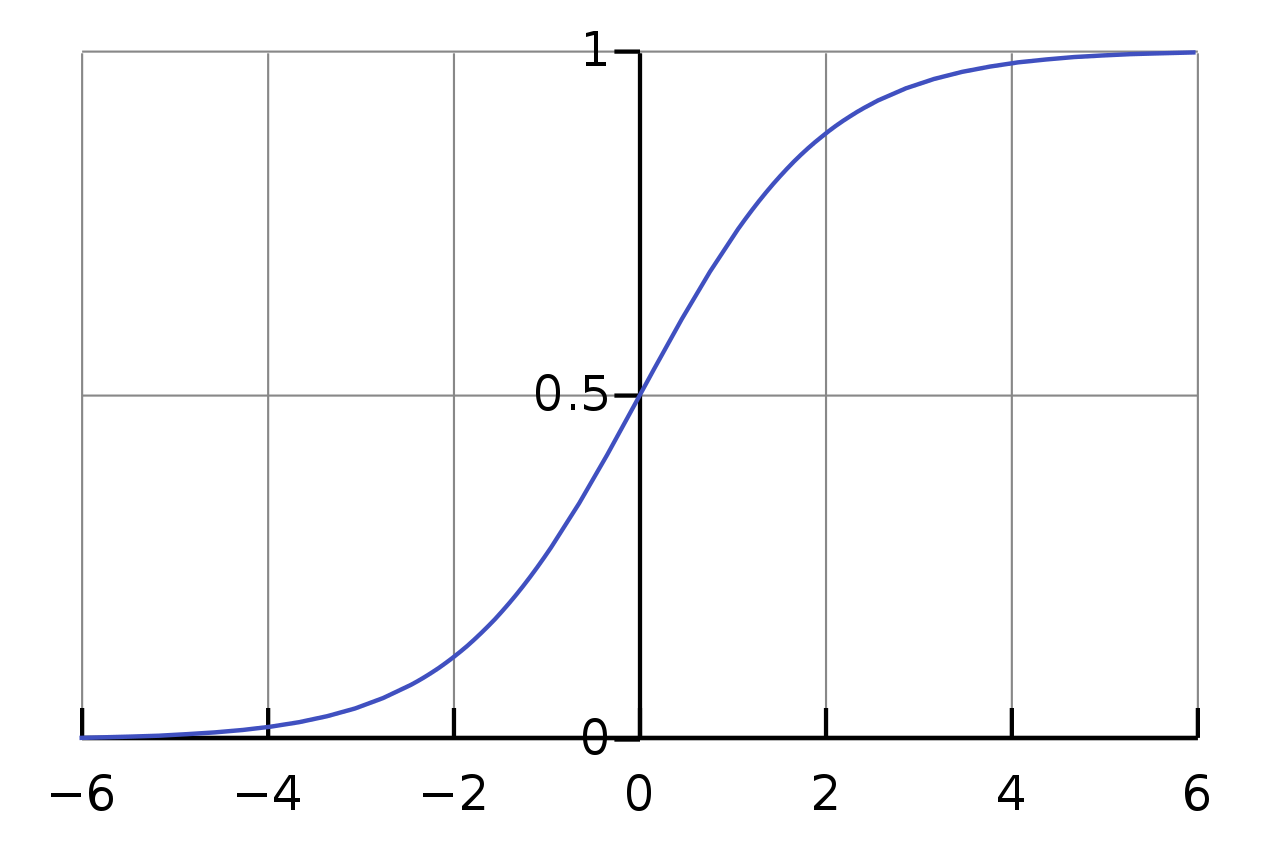
</div>

For positive samples, maximize $P(y_i = 1)$. For negative samples, maximize $P(y_i = -1)$. Therefore, always maximize $|y_i/2 - 0.5 + \hat{y}_i|$

Over all training instances maximize the likelihood $\mathcal{L}$ where

$$\mathcal{L} = \prod_{i=1}^n |y_i/2 - 0.5 + \hat{y}_i| \qquad (2.14)$$

Note this is a product because they are probabilities.

Thus,

$$L_i = -\log(|y_i/2 - 0.5 + \hat{y}_i|)$$

for each training instance.

A simple conversion using the properties of logarithms then gives us an additive minimization:

$$-\log (\mathcal{L}) = \sum_{i=1}^n -\log (|y_i/2 - 0.5 + \hat{y}_i|) \qquad (2.15)$$

*why $\mathcal{L} \mathcal{L}$ here?*

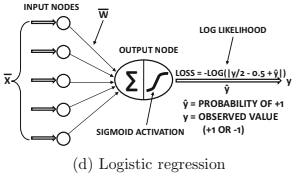

Therefore the gradient for the loss function is

$$\frac{\partial L_i}{\partial \overline{W}} = -\frac{y_i \overline{X}_i}{1 + \exp(y_i \overline{W} \cdot \overline{X}_i)} \qquad (2.16)$$

Hence, the gradient descent updates of logistic regression are:

$$ \overline{W} \impliedby \overline{W} (1 - \alpha \lambda) + \alpha \frac{y_i \overline{X}_i}{1 + \exp[y_i (\overline{W} \cdot \overline{X}_i)]} \qquad (2.17)$$

### 2.2.3.1 Alternative Choices of Activation and Loss

Yeah so you can use a different choice, which will be explored in a later chapter...

## 2.2.4 Support Vector Machines

Neural Architecture of the SVM is identical to Widrow-Hoff. The main difference is the choice of the loss function. 

The loss function (hinge-loss) for the $i^{th}$ training instance is

$$L_i = \max \{0, 1 - y_i \hat{y}_i\} \qquad (2.19)$$

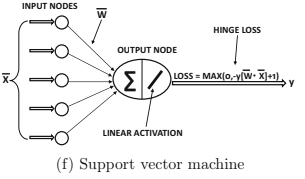

Hinge Loss makes it so that a positive training instance is only penalized for being less than 1, and a negative training instance is only penalized for being greater than −1. In both cases, the penalty is linear, and abruptly flattens out at the aforementioned thresholds. This eliminates the achilles heel which was exhibited by WH, as shown in the figure.

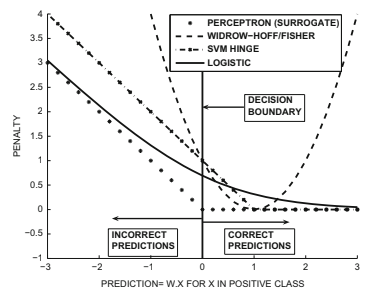

Therefore **only misclassified points or points that are too close to the decision boundary are penalized**.

The gradient therefore is

$$\frac{\partial L_i}{\partial \overline{W}} = -y_i \overline{X}_i \text{ if } y_i \hat{y}_i < 1 \quad \text{ and } 0 \text{ otherwise} \qquad (2.20)$$

If the condition is satified to be less than 1, the update is the following with the indicator function being 1 when the arg is satisifed:

$$\overline{W} \impliedby \overline{W} (1- \alpha \cdot \lambda) + \alpha y_i \overline{X}_i [I(y_i \hat{y}_i < 1)]  \qquad (2.21)$$

Therefore, a perceptron makes the update only when a point is misclassified, whereas the support vector machine also makes updates for points that are classified correctly, albeit not very confidently.

Similarites and differences of models are as tabulated:

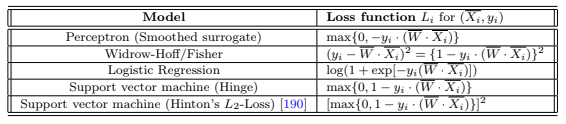

Basically this section is saying that rudimentary special cases of neural networks are instantiations of well-known algorithms in the machine learning literature.

# 2.3 Neural Architectures for Multiclass Models

Okay so Binary Classification is cool and all but what about classification with $k$ classes?

## 2.3.1 Multiclass Perceptron

Each training instance is the same, but now instead of some $y_i$, we have a class $k$ we want to be labeled within the training instance $(\overline{X}_i, c(i))$, where $c(i)$ is simply an index function of the observed class. Therefore we are going to have a bunch of weight vectors for the $k$ classes to be able to find the linear separators we want.

Notably we want to find these separators simultaneously, and then have it be the case that the value of $\overline{W}_{c(i)} \cdot \overline{X}_i$ is larger than the other values for the other classes (mathematically $\overline{W}_r \cdot \overline{X}_i$ for each $r \neq c(i)$)

Why you ask? We want to only predict one class $k$, and the training instance which does this will have the largest value of $\overline{W}_r \cdot \overline{X}_i$. So the loss function is

$$L_i = \max_{r:r \neq c(i)} \max (\overline{W}_r \cdot \overline{X}_i - \overline{W}_{c(i)} \cdot \overline{X}_i,0)$$

aka the maximum class of the max of the difference of the two dot products of the opposing training instances or zero. Mouthful!

Illustrated,

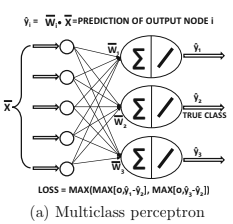

When an instance is correctly classified, again nothing happens (gradient is zero). However for a misclassified instance the gradients depend upon whether the $r^{th}$ class is equal to the indexed function class $c(i)$,

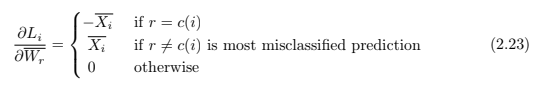

Ok, so if the correct class $r = c(i)$ receives the largest of output $\overline{W}_r \cdot \overline{X}_i$, no update is necessary (we only update on misclassified as shown previously).

**But**, an update is made for each separator $\overline{W}_r$ with learning rate $\alpha > 0$ as follows:

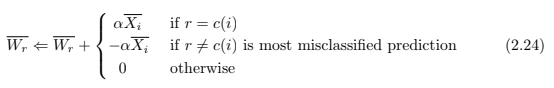

## 2.3.2 Weston-Watkins SVM

1. Updates the separator of any class that is predicted more favorably than the true class.

2. Updates the separators in cases where an incorrect class gets a prediction that is “uncomfortably close” to the true class.

Ok so everything is the same as the multiclass perceptron except for the loss function.

The loss function for the WW SVM is

$$L_i = \sum_{r:r \neq c(i)} \max (\overline{W}_r \cdot \overline{X}_i - \overline{W}_{c(i)} \cdot \overline{X}_i + 1,0) \qquad (2.25)$$

and the architecture is the same except for this loss function:

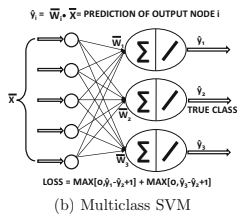

Points 1 and 2 are accomplished because for the classes that are incorrect lag by 1 behind the true class and all losses over all classes where that is the case are added.

Hence the gradient must reflect these differences, and they do when $\delta (r, \overline{X}_i)$ is a 0/1 indicator function.

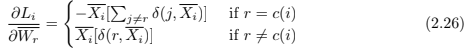

Hence the gradient descent step for the $r^{th}$ separator is:

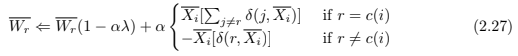

When the loss is zero for a training instance, the previous update is just simplified for each $r$ hyperplane:

$$\overline{W}_r \impliedby \overline{W}_r (1 - \alpha \lambda) \qquad (2.28)$$



## 2.3.3 Multinomial Logistic Regression (Softmax Classifier)

Multi-way generalization of logistic regression.

A little unsure on the "posterior-probability" but let's give it a go.

If we take the same ideas from the binary logistic regression, then everything should follow given this idea of the posterior probability. The estimation for this posterior is

$$P(r| \overline{X}_i) = \frac{\exp (\overline{W}_r \cdot \overline{X}_i)}{\sum_{j=1}^k \exp (\overline{W}_r \cdot \overline{X}_i)} \qquad (2.29)$$

So it is just predicting the classes but in terms of probabilites because logits want probabilities.

I understand what it's saying here but I don't get the math (316 failed me here I guess) sooo... I'll just put this in here and we can talk about it :D

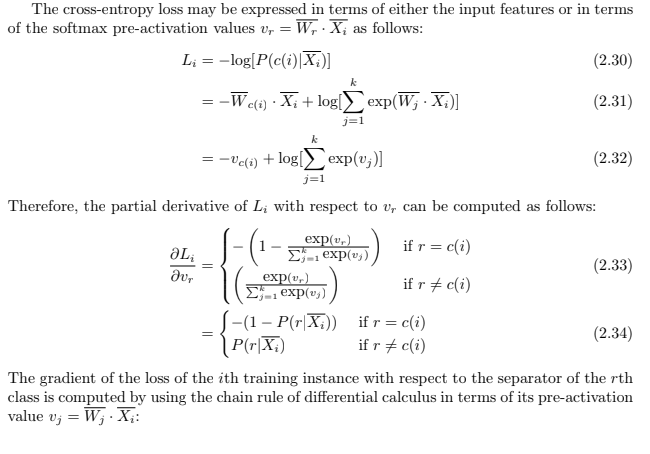

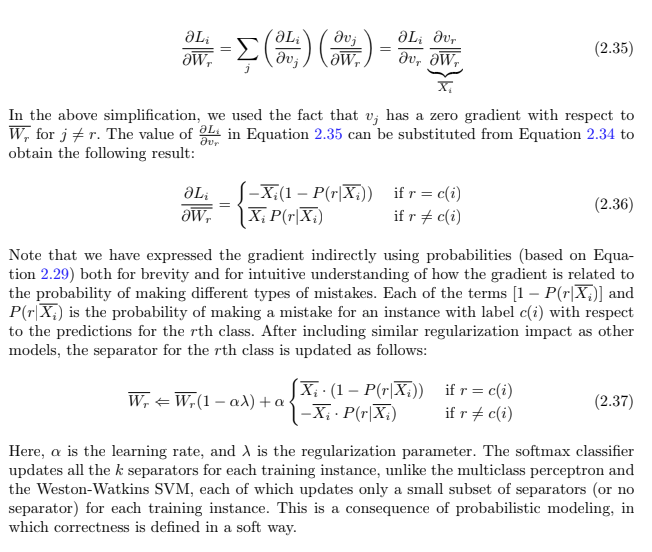




## 2.3.4 Hierarchical Softmax for Many Classes

Learning is slow with many classes with these methods (example text mining). To improve efficiency, we can group classes in a methodical way into a binary tree structure so that we can jump down the tree at a logarithimic pace, and then classify it.

If we group the classes in an intelligent way (group similar classes), then a significant speed increase can be seen.

# 2.4 Backpropagated Saliency for Interpretability and Feature Selection

To determine the features which impact the classification most, one can use backpropagation. If we can determine the sensitivity of the output on an individual feature, then we gain insight into this solution.

By identifying features with a large absolute magnitude of the sensitivity, they must be related to the classification of that training instance. 

So theoretically if we backpropagate and check sensitivty we can see the most impactful features in each instance. 

Overall, the features which exhibit the largest aggregate sensitivity over all of the training set are the most relevant features to the outputs.

# 2.5 Matrix Factorization with Autoencoders

Autoencoders are a fundamental architecture, special cases are PCA and singlular value decompisition. Small changes in the underlying building blocks of the neural network can be used to implement variations of a family of methods. A setup such as this can show a way to generalizations to nonlinear dimensionality reduction. 

## 2.5.1 Autoencoder: Basic Principles

Most autoencoder architectures are symmetric. We try to reconstruct each dimension by passing it through the network. An autoencoder replicates the data from the input to the output (sometimes referred to as replicator neural network). Since the layers in between the input and output layers have less nodes, they are the constricted layers. Hence the constricted layers have a reduced view of the data because of the constricted layers and thus the output does not replicate the input exactly. 

The loss function uses the sum-of-squared differences in between the input and output to force the output to be as similar as possible to the input. The representation of the innermost hidden layer will be related to those in the two outer hidden layers.

Common for an $M$-layer autoencoder to be symmetric with the number of units in the $k^{th}$ layer is the same as the number of units in the $(M-k+1)^{th}$ layer, and the value of $M$ is often odd. This implies that the $(M + 1)/2$ layer is the most contrsicted layer. Because of the symmetry the weights are tied to their symmetric brother, however the symmetry is not absolute because of the nonlinear activation function.

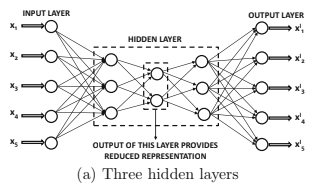

The reduced representation of the data is known as the code, and the number of units in the most constricted layer is the dimensionality of the reduction. Before the bottleneck: encoder, after: decoder.

The schematic is as follows:

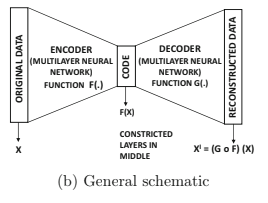

### 2.5.1.1 Autoencoder with a Single Hidden Layer

Autoencoder has a single hidden layer of $k << d$ units betweeen the input and output layers of $d$ units each. 

$D$ is a matrix which is $n \times d$ and we want to factorize it into two separate matrices $U$ and $V$.

$U$ is a matrix which is $n \times k$

$V$ is a matrix which is $d \times k$

Thus $D \approx UV^T \qquad (2.38)$

$k$ is the rank of factorization, and the rank of a matrix $A$ is the dimension of the vector space generated (or spanned) by its columns. This corresponds to the maximal number of linearly independent columns of $A$. This, in turn, is identical to the dimension of the vector space spanned by its rows. Rank is thus a measure of the "nondegenerateness" of the system of linear equations and linear transformation encoded by $A$.

The matrix $U$ contains the reduced representation of the data, and the matrix $V$ contains the basis vectors.

Traditional machine learning uses the Frobenius norm.

In the neural architecture it is slightly different.

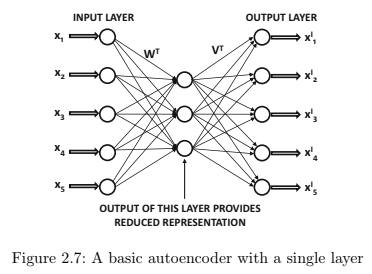

The hidden layer has $k$ units. The rows of $D$ are input into the autoencoder, and the $k$-dimensional rows of $U$ are the activations of the hidden layer. The weights in the decoder are $V^T$.

The reconstructed output contains the rows of $UV^T$.

The autoencoder minimizes the sum-of-squared differences between the input and output, which is equivalent to minimizing $||D - UV^T||^2$.

#### Encoder Weights

The encoder weights are defined by $W$. There are many alternate optima for $W$ and $V$, but in order for reconstruction to occur (i.e., minimization of loss function), the learned matrix $W$ will always be (approximately) related to $V$ as its pseudo-inverse and the columns of $V$ will always span a particular $k$-dimensional subspace defined by the SVD optimization problem.

### 2.5.1.2 Connections with Singular Value Decompisition

The single-layer autoencoder architecture is closely connected with singular value decomposition (SVD).

### 2.5.1.3 Sharing Weights in Encoder and Decoder

$W$ and $V$ have different possible solutions. By sharing the weights in the encoder and decoder (tying the weights), one can reduce the parameter footprint. For this particular shallow case one can use $W = V^T \qquad (2.41)$

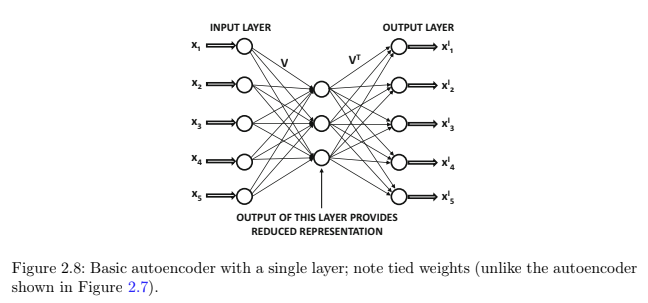

The $d \times k$ matrix $V$ of weights is first used to transform the $d$-dimensional data point $\overline{X}$ into a $k$-dimensional representation. Then, the matrix $V^T$ of weights is used to reconstruct the data to its original representation.

Tying the weights makes $V^T$ the pseudo-inverse of $V$, thus $V^T V = I$.

The sharing of weights does require some changes to the backpropagation algorithm during training.

### 2.5.1.4 Other Matrix Factorization Methods

There are other models...

## 2.5.2 Nonlinear Activations

The real power of autoencoders is realized when one starts using nonlinear activations and multiple layers. For a neural network practitioner, the change from the SVD model to that of logistic matrix factorization is a relatively small one, where only the final layer of the neural network needs to be changed. It is this modular nature of neural networks that makes them so attractive to engineers and encourages all types of experimentation.

One can also use non-linear activations in the hidden layer rather than (or in addition to) the output layer. By using the non-linearity in the hidden layer to impose non-negativity, one can simulate non-negative matrix factorization. 

Consider an autoencoder with a single hidden layer in which sigmoid units are used in the hidden layer, and the output layer is linear. Furthermore, the input-to-hidden and the hidden-to-output matrices are denoted by $W^T$ and $V^T$, respectively. In this case, the matrix $W$ will no longer be the pseudo-inverse of $V$ because of the non-linear activation in the hidden layer. 

$U$ then is the output of the hidden layer for which the nonlinear activation $\Phi(\cdot)$ is applied.

$$U = \Phi (DW^T) \qquad (2.43)$$

Provided the output layer is linear then the overall factorization is the same form as (2.38).

But we can write $U' = DW^T$ which is a lienar projection of the original matrix $D$. Rewritten,

$$D \approx \Phi (U') V^T \quad (2.45)$$

It is simplistic in the shallow case, but multiple hidden layers are used to learn more complex forms of nonlinear dimensionality reduction. Nonlinearity can also be combined in the hidden layers and in the output layer. Nonlinear dimensionality reduction methods can map the data into much lower dimensional spaces than would be possible with methods like PCA.


An example of a data set, which is distributed on a nonlinear spiral, is shown in Figure 2.9(a). This data set cannot be reduced to lower dimensionality using PCA (without causing significant reconstruction error). However, the use of nonlinear dimensionality reduction methods can flatten out the nonlinear spiral into a 2-dimensional representation. This representation is shown in Figure 2.9(b).

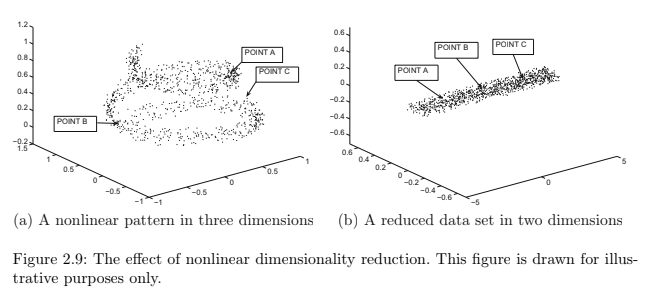

## 2.5.3 Deep Autoencoders

One can increase the number of intermediate layers in order to further increase the representation power of the neural network, like in figure 2.10.

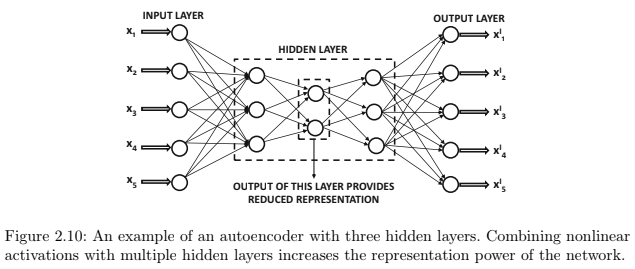

When a nonlinear activation function is used it increases its representation power as opposed to linear ones. Although several methods for nonlinear dimensionality reduction are known in machine learning, neural networks have some advantages over these methods:

1. Hard time mapping out-of-sample data points to reduced representations
2. More flexibility and power by changing the neural architecture. Also the ability to choose specific types of activation functions.

Greater reduction is always achieved by using nonlinear units, which implicitly map warped manifolds into linear hyperplanes. The superior reduction in these cases is because it is easier to thread a warped surface (as opposed to a linear surface) through a larger number of points. This property of nonlinear autoencoders is often used for 2-dimensional visualizations of the data by creating a deep autoencoder in which the most compact hidden layer has only two dimensions. These two dimensions can then be mapped on a plane to visualize the points. In many cases, the class structure of the data is exposed in terms of well-separated clusters.

Illustrated:

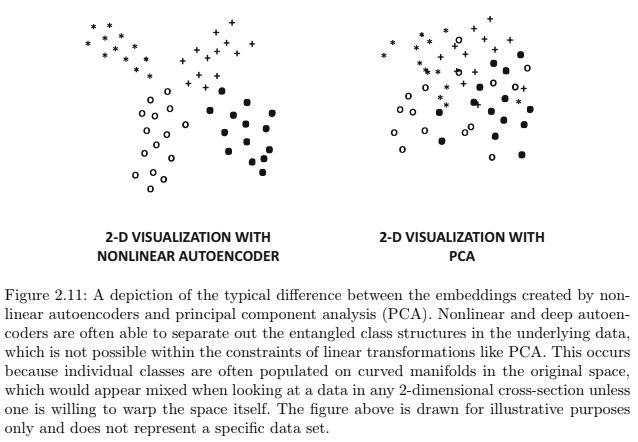

Linear dimensionality reduction methods cannot attain clear separation because nonlinearly entangled shapes are not linearly separable.

## 2.5.4 Application to Outlier Detection

Dimensionality reduction is closely related to outlier detection, because outlier points are hard to encode and decode without losing substantial information. Reconstruction to $D'$ misses all unusual variations, hence the absolute values of the entries of $(D - D')$ represents the outlier scores which allows us to detect the outliers!

## 2.5.5 When the Hidden Layer is Broader than the Input Layer

A constricted hidden layer forces dimensionality reduction, and the loss function is designed to avoid information loss. Such representations are referred to as undercomplete representations, and they correspond
to the traditional use-case of autoencoders.

When the number of hidden units is greater than the input dimensionality it is referred to as over-complete representations. Thus it is possible for the hidden layer to simply learn the identity function. An over-complete representation may be created, although it may not have the property of sparsity (which needs to be explicitly encouraged).

### 2.5.5.1 Sparse Feature Learning

If sparsity constraints are explicitly imposed, it is referred to as a sparse autoencoder. The sparse representation of a $d$-dimensional point is a $k$-dimensional point in which $k >> d$ and most of the values in the sparse representation are 0s. If the available input is not sparse to begin with, there are often benefits in creating a sparse transformation where such a flexibility of representation exists. Also sparse representations enable the effective use of particular types of efficient algorithms that are highly dependent on sparsity.

1. One can impose an $L_1$ penalty on the activations in the hidden layer to force sparse activations. Rarely used
2. One can allow only the top-r activations in the hidden layer to be nonzero for $r \leq k$. In such a case, backpropagation only backpropagates through the activated units. This approach is referred to as the r-sparse autoencoder.
3. Winner-take-all autoencoder. Only a fraction f of the activations of each hidden unit are allowed over the whole training data. The backpropagation algorithm needs to propagate the gradient only through the activated units.

## 2.5.6 Other Applications

There are many other applications.

## 2.5.7 Recommender Systems: Row Index to Row Value Prediction

Eh, was ok but not very interested in recommender systems.

## 2.5.8 Discussion

Goal of this section: show the benefits of the modular nature of neural networks in unsupervised learning.


Minor changes to the neural architecture can achieve very different types of goals in intuitive settings. However, from an architectural point of view, the amount of effort required by the analyst to change from one architecture to the other is often a few lines of code. This is because modern softwares for building neural
networks often provide templates for describing the architecture of the neural network, where each layer is specified independently. In a sense, the neural network is “built” with the well known types of machine-learning units much like a child puts together building blocks of a toy. Backpropagation takes care of the details of optimization, while shielding the user from the complexities of the steps. Changing the output layer from linear to sigmoid (along with a change of loss function) can literally be a matter of changing
a trivially small number of lines of code without affecting most of the remaining code.